# **Proyek Analisis Data : Air_Quality_Shunyi**

Nama : Fikri Alinfijar 

Email : fikrialnfjr@gmail.com

Id Dicoding : fikrialnfjr

## Pertanyaan Bisnis

1.Bagaimana kualitas udara di Shunyi berdasarkan PM2.5 setiap tahunnya?


2. Apakah terdapat pola musiman pada kualitas udara Shunyi setiap tahunnya berdasarkan PM10?

## Library

In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data 

In [27]:
df = pd.read_csv('Air_Quality_Shunyi.csv')
df = df.drop(columns=['No', 'RAIN', 'wd', 'station'])
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
0,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,9.3
1,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,9.4
2,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,8.6
3,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,6.6
4,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,1.8
35060,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,1.5
35061,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,1.7
35062,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,1.8


### Assessing Data

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   PM2.5   34151 non-null  float64
 5   PM10    34516 non-null  float64
 6   SO2     33768 non-null  float64
 7   NO2     33699 non-null  float64
 8   CO      32886 non-null  float64
 9   O3      33575 non-null  float64
 10  TEMP    35013 non-null  float64
 11  PRES    35013 non-null  float64
 12  DEWP    35010 non-null  float64
 13  WSPM    35020 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 3.7 MB


In [29]:
df.shape

(35064, 14)

In [30]:
df.isnull().sum()

year        0
month       0
day         0
hour        0
PM2.5     913
PM10      548
SO2      1296
NO2      1365
CO       2178
O3       1489
TEMP       51
PRES       51
DEWP       54
WSPM       44
dtype: int64

In [31]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas atas dan batas bawah untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengidentifikasi outlier
outliers = ((df < lower_bound) | (df > upper_bound)).sum()

print(outliers)

year        0
month       0
day         0
hour        0
PM2.5    1501
PM10     1180
SO2      3011
NO2       579
CO       1969
O3       1562
TEMP        0
PRES        0
DEWP        0
WSPM     1984
dtype: int64


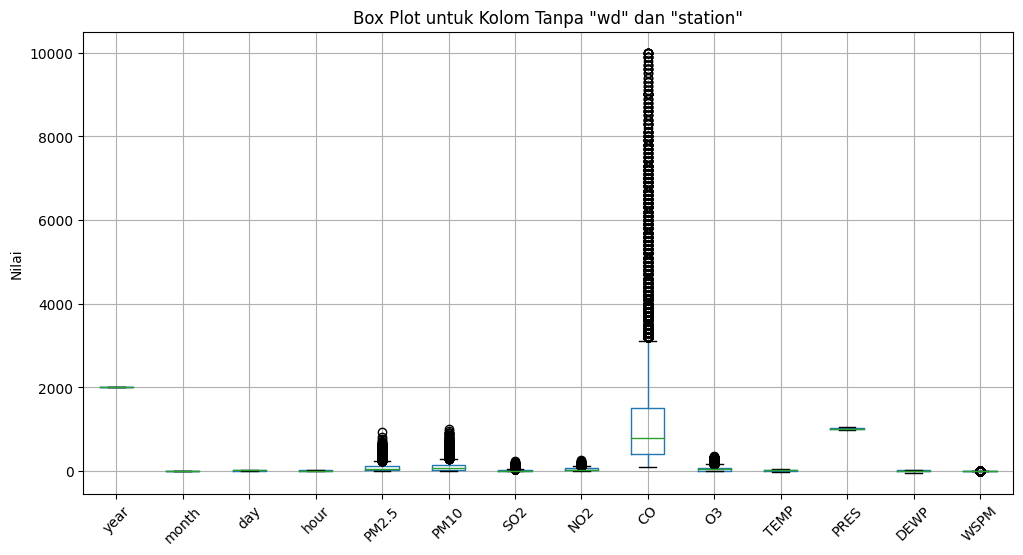

In [32]:
# Membuat box plot untuk setiap kolom
plt.figure(figsize=(12, 6))  # Ukuran plot bisa disesuaikan
df.boxplot()
plt.title('Box Plot untuk Kolom Tanpa "wd" dan "station"')
plt.ylabel('Nilai')
plt.xticks(rotation=45)  # Melabeli sumbu x dengan rotasi teks
plt.show()

### Cleaning Data

In [33]:
# Mengisi missing value dengan mean untuk kolom-kolom numerik
kolom_numerik = df.select_dtypes(include=['int', 'float'])
df[kolom_numerik.columns] = df[kolom_numerik.columns].fillna(df[kolom_numerik.columns].mean())

# Mengisi missing value dengan modus untuk kolom objek jika mode() tidak kosong
kolom_objek = df.select_dtypes(include=['object'])
if not kolom_objek.empty:
    df[kolom_objek.columns] = df[kolom_objek.columns].fillna(df[kolom_objek.columns].mode().iloc[0])


In [34]:
df.isnull().sum()

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
WSPM     0
dtype: int64

In [35]:
# Menghapus baris yang mengandung outliers berdasarkan batas atas dan bawah
df_cleaned = df[(df >= lower_bound) & (df <= upper_bound)].dropna()

# Menampilkan DataFrame setelah menghapus outliers
print(df_cleaned)


       year  month  day  hour  PM2.5  PM10   SO2   NO2      CO    O3  TEMP   
5      2013      3    1     5   11.0  11.0   3.0   7.0   200.0  45.0  -2.8  \
6      2013      3    1     6   12.0  12.0   3.0   9.0   300.0  74.0  -4.0   
7      2013      3    1     7   13.0  13.0   3.0  23.0   300.0  59.0  -2.4   
8      2013      3    1     8    8.0   8.0   3.0  19.0   400.0  66.0  -1.0   
9      2013      3    1     9    3.0   6.0   3.0  21.0   400.0  60.0   0.0   
...     ...    ...  ...   ...    ...   ...   ...   ...     ...   ...   ...   
35059  2017      2   28    19   27.0  72.0   8.0  92.0   800.0  16.0  10.3   
35060  2017      2   28    20   47.0  55.0  17.0  86.0  1100.0  19.0   9.8   
35061  2017      2   28    21   18.0  28.0   4.0  30.0   500.0  64.0   9.1   
35062  2017      2   28    22   18.0  20.0   9.0  33.0   500.0  59.0   7.1   
35063  2017      2   28    23   15.0  22.0  13.0  34.0   500.0  60.0   7.4   

         PRES  DEWP  WSPM  
5      1028.2 -22.1   1.7  
6      

In [36]:
# Menghitung jumlah outliers setelah penghapusan
outliers_sesudah = ((df_cleaned < lower_bound) | (df_cleaned > upper_bound)).sum()

# Menampilkan jumlah outliers setelah penghapusan
print(outliers_sesudah)


year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
WSPM     0
dtype: int64


## Exploratory Data Analysis (EDA)

In [37]:
df = df_cleaned

In [38]:
df.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,WSPM
count,26892.000000,26892.000000,26892.000000,26892.000000,26892.000000,26892.000000,26892.000000,26892.000000,26892.000000,26892.000000,26892.000000,26892.000000,26892.000000,26892.000000
mean,2014.669567,6.707906,15.755318,10.984494,60.662873,77.233776,8.555768,39.382479,918.363387,49.773770,14.122202,1012.729474,3.657272,1.597676
std,1.169947,3.259543,8.811826,7.015626,51.946312,59.079423,8.893103,24.494103,615.539934,41.223363,10.965006,10.116390,13.749323,0.892563
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.000000,988.000000,-33.100000,0.000000
25%,2014.000000,4.000000,8.000000,5.000000,18.000000,27.000000,2.000000,20.000000,400.000000,13.000000,4.700000,1004.500000,-8.000000,1.000000
50%,2015.000000,7.000000,16.000000,10.000000,47.000000,65.000000,4.000000,36.000000,800.000000,46.000000,16.000000,1012.000000,5.600000,1.400000
75%,2016.000000,9.000000,23.000000,17.000000,86.000000,113.000000,13.000000,54.000000,1200.000000,72.000000,23.300000,1020.500000,16.000000,2.100000
max,2017.000000,12.000000,31.000000,23.000000,251.000000,298.000000,39.000000,126.000000,3100.000000,177.000000,37.800000,1042.800000,27.500000,4.200000


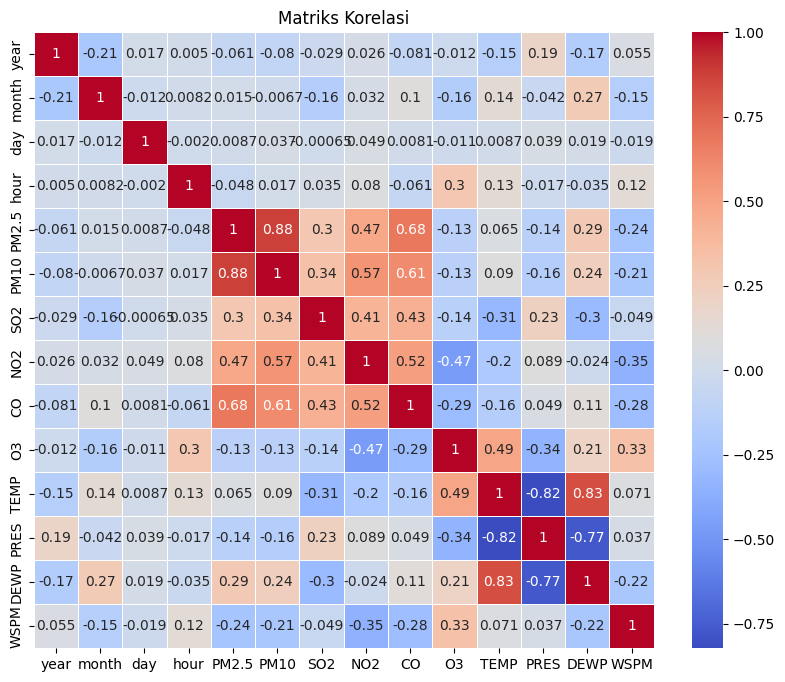

In [39]:
# Matriks korelasi
corr_matrix = df.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()


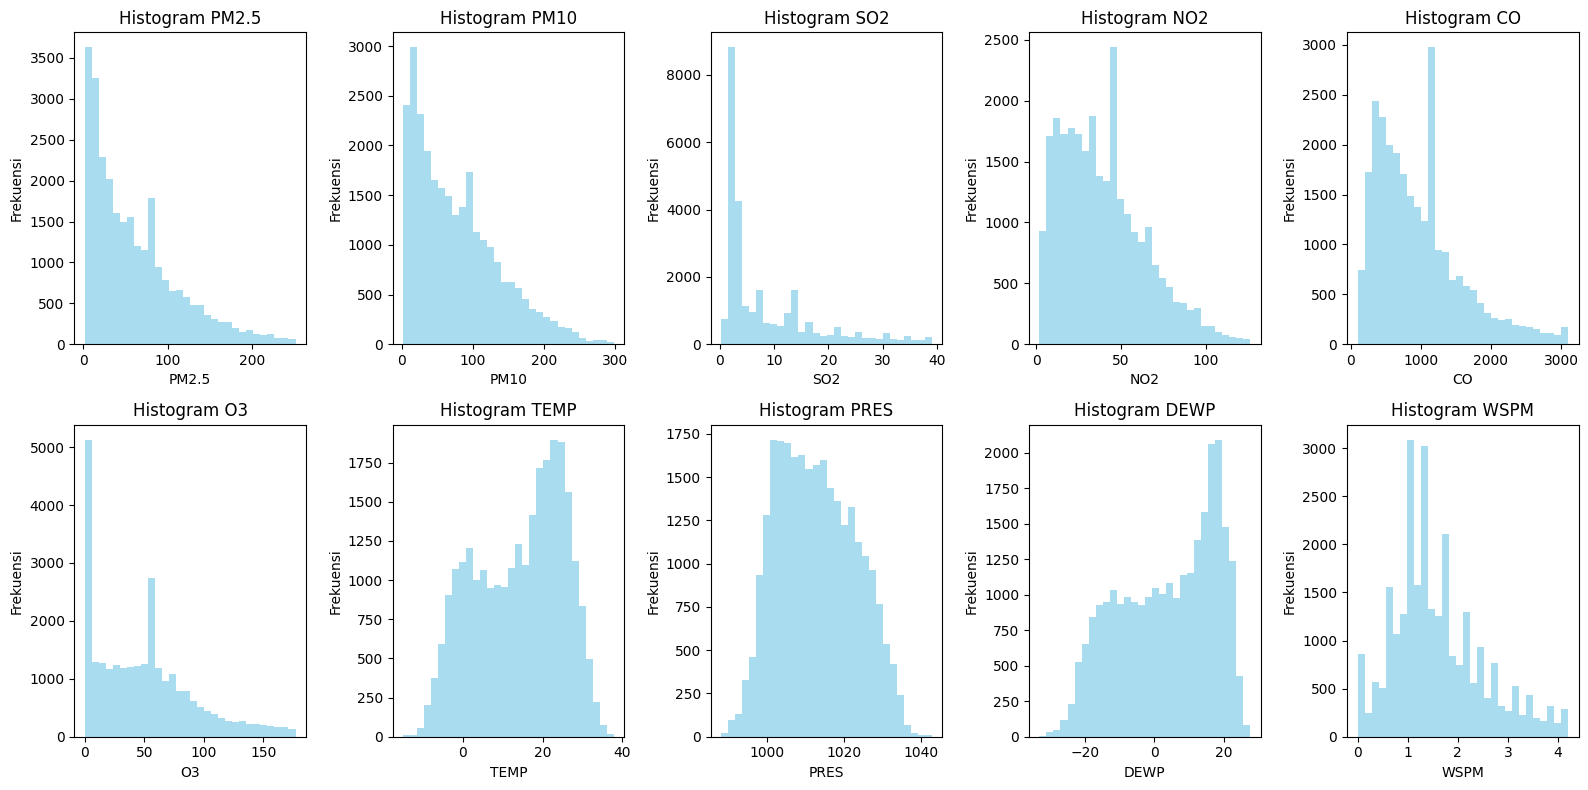

In [40]:
#persebaran data
kolom_persebaran = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "WSPM"]

# Membuat subplots dengan grid 2x5
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(16, 8))

# Menampilkan histogram untuk setiap kolom
for i, kolom in enumerate(kolom_persebaran):
    row = i // 5
    col = i % 5
    axes[row, col].hist(df[kolom], bins=30, color='skyblue', alpha=0.7)
    axes[row, col].set_title(f'Histogram {kolom}')
    axes[row, col].set_xlabel(kolom)
    axes[row, col].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()


### Pertanyaan 1

#### Bagaimana kualitas udara di Shunyi berdasarkan PM2.5 setiap tahunnya?

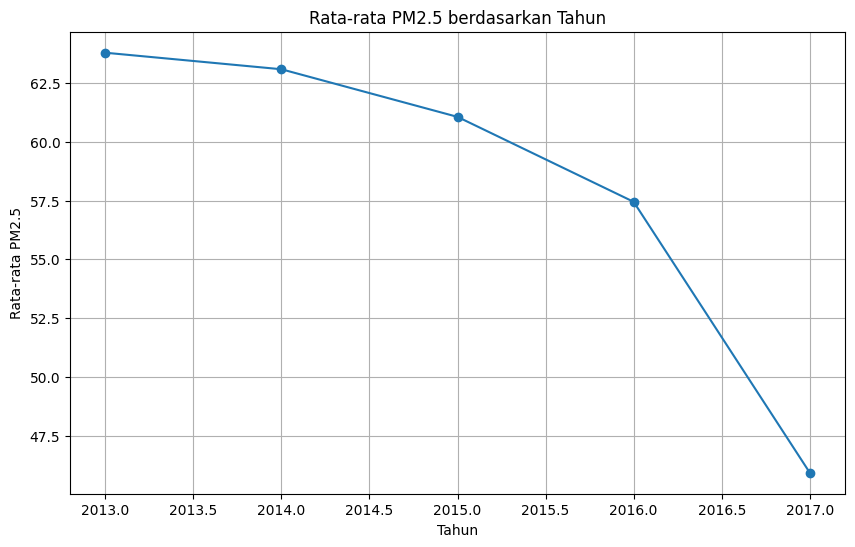

In [41]:
rata2_pm25_per_tahun = df.groupby('year')['PM2.5'].mean()

plt.figure(figsize=(10, 6))
plt.plot(rata2_pm25_per_tahun.index, rata2_pm25_per_tahun.values, marker='o', linestyle='-')
plt.title('Rata-rata PM2.5 berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.grid(True)
plt.show()


##### Kesimpulan : 

Dari grafik terebut, didapatkan bahwa rata-rata PM2.5 pada Shunyi setiap tahunnya selalu berada diatas 40 mikrogram per meter kubik. 
Hal tersebut dapat diartikan bahwa kualitas udara di Shunyi buruk, karena menurut WHO batas ambang untuk PM2.5 adalah 15 mikrogram per meter kubik.

### Pertanyaan 2

#### Apakah terdapat pola musiman pada kualitas udara Shunyi setiap tahunnya berdasarkan PM10?

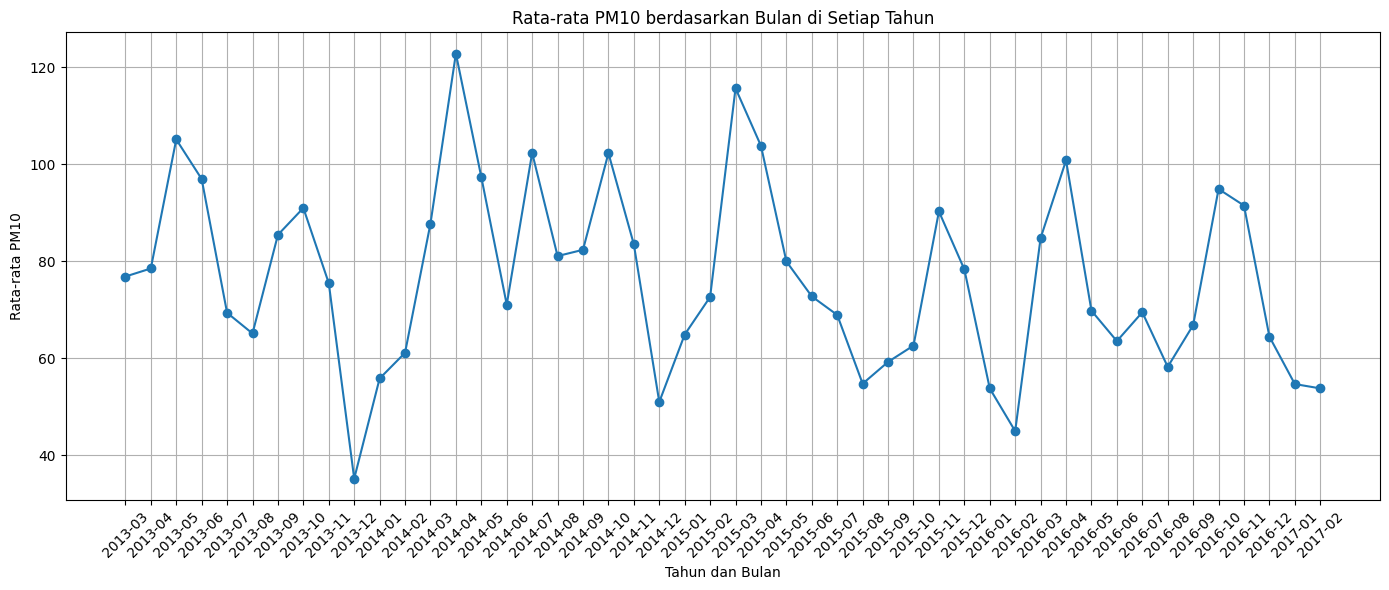

In [42]:
rata2_pm10_per_tahun_bulan = df.groupby(['year', 'month'])['PM10'].mean()
rata2_pm10_per_tahun_bulan.index = rata2_pm10_per_tahun_bulan.index.map(lambda x: f'{x[0]}-{x[1]:02}')

plt.figure(figsize=(14, 6))
plt.plot(rata2_pm10_per_tahun_bulan.index, rata2_pm10_per_tahun_bulan.values, marker='o', linestyle='-')
plt.title('Rata-rata PM10 berdasarkan Bulan di Setiap Tahun')
plt.xlabel('Tahun dan Bulan')
plt.ylabel('Rata-rata PM10')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()


##### Kesimpulan : 

Dari grafik tersebut, didapatkan bahwa terdapat pola musiman yang terjadi pada bulan 10 hingga 5 bulan setelahnya.

## Analisis CLustering

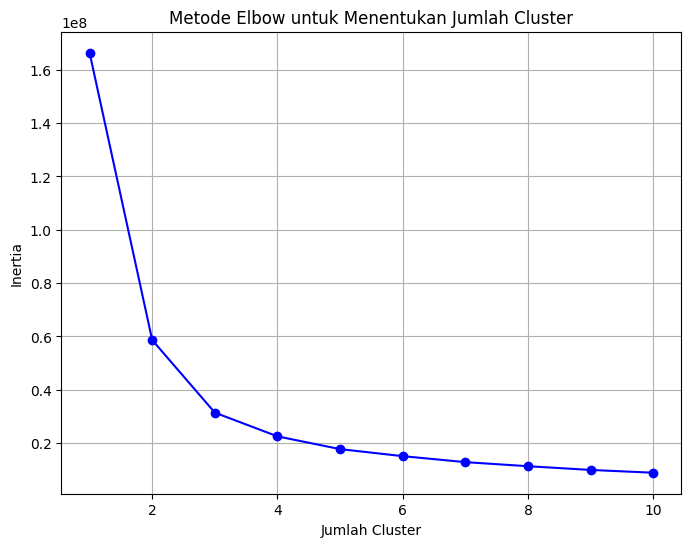

In [43]:
data = df[['PM2.5', 'PM10']]

# Menentukan jumlah cluster (gunakan metode Elbow untuk memilih jumlah cluster yang optimal)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method untuk menentukan jumlah cluster yang optimal
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster')
plt.grid(True)
plt.show()


##### Kesimpulan : 

Grafik tersebut merupakan presentasi dari metode Elbow dalam menentukan jumlah kluster yang paling optimal. Dari grafik tersebut, didapatkan bahwa jumlah kluster yang paling optinmal adalah 3 kluster.


Jumlah Data dalam Setiap Cluster:
   Cluster  Jumlah Data
0        1        13340
1        2         9553
2        0         3999


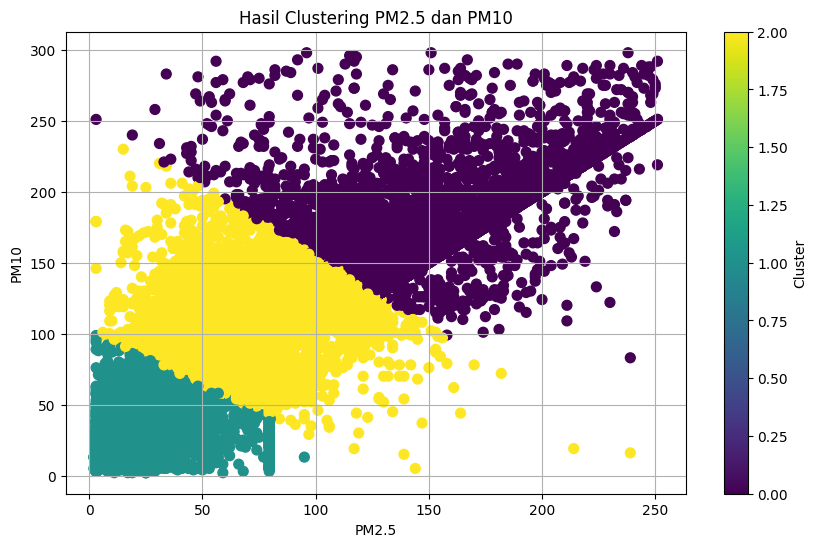

In [44]:
# Berdasarkan hasil Elbow Method, pilih jumlah cluster yang optimal
k = 3  

# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=k, random_state=0, n_init=1)
clusters = kmeans.fit_predict(data)

# Menambahkan label cluster ke DataFrame
df['Cluster'] = clusters

# Menampilkan jumlah data dalam setiap cluster
cluster_counts = df['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Jumlah Data']
print("\nJumlah Data dalam Setiap Cluster:")
print(cluster_counts)

# Plot hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['PM2.5'], df['PM10'], c=df['Cluster'], cmap='viridis', marker='o', s=50)
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('Hasil Clustering PM2.5 dan PM10')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()